# 1-sample Student T-test

This notebook serves as a tutorial to perform a 1-sample Student T-test. One of the goal of this statistical test is usually to *check whether a considered sample comes from a population with a specific mean*, under some conditions and acceptable risks.

Thus, we will unroll in this tutorial the idea and the methodology behind the **1-sample Student T-test** to perform this experiment on a concrete use case.

## A/ Sampling from the population

To begin the experiment, we need to first collect a data sample to work with. This is done by drawing a set of values from a random normal distribution generated with *NumPy*. We draw `30` values from the distribution that will serve as our feature vector on which we will perform the Student T-test.

In [ ]:
# Import NumPy library to generate random numbers and vectors
import numpy as np

# Generate the feature vector values from a random normal distribution
feature_vector = np.random.normal(loc=50, scale=3, size=(30,))
print('Length of the feature vector :', len(feature_vector))
print('Values in the feature vector :\n', feature_vector)

Length of the feature vector : 30
Values in the feature vector :
 [51.79438092 50.68340682 48.72487508 47.34825685 48.30993278 51.24081304
 52.46233169 53.11174444 50.75017647 48.47522169 52.12671075 47.96696707
 51.14640843 50.83482997 46.26191657 46.72981263 47.22851258 51.93307112
 50.4961341  55.34999344 47.41409592 49.10834785 50.79910072 55.53954241
 50.32527817 50.09736851 45.37047412 55.10463159 47.57017236 48.62288483]


Once our feature vector (sampled values) has been generated, we can quickly visualize its values and its distribution with a histogram. We can see here, even though we do not have a lot of values, that we are not very far from having a normal distribution.

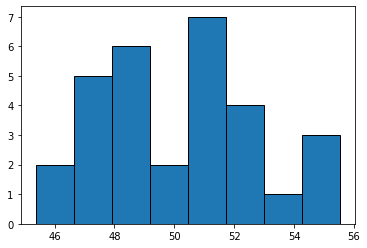

In [ ]:
# Import Matplotlib library to visualize data
import matplotlib.pyplot as plt

# Visualize the histogram of the feature vector values distribution
plt.hist(feature_vector, bins=8, ec='k', lw=1) ; plt.show()

## B/ Checking test conditions

Before we can run the Student T-test, we need to check whether our sampled feature vector respect a few conditions. The necessary conditions to check regarding our sample are the following ones :
1. Data is *continuous*.
2. Data has been *randomly sampled* from a population.
3. Data is approximately following a *normal distribution*.
4. Data *variability is similar* among samples groups.

As we have seen from the previous histogram and data sampled values, data is continuous and approximately normally distributed. It has been sampled by a random selection process among the population and its variance is supposed to be similar among sampled groups.

We know, or we can compute, the mean and the standard deviation of the sample, but we do not know the mean and the standard deviation of the population. The mean of the sample can act as an estimate of the mean of the population, but the goal is to check this assumption.

## C/ Statements of the statistical test

We want to check whether the sampled feature vector comes from a population that has a mean corresponding to our expectations. Therefore, we perform a **1-sample 2-tailed Student T-test** on the sample, to verify whether our assumption is right.

Thus, we set up the set of following hypothesis (null and alternative) :
- **H0** (null hypothesis)
  - The feature vector comes from a population with a mean of 50, the range of sampled values being in [1;100].
- **H1** (alternative hypothesis)
  - The feature vector does not come from a population with a mean of 50.

We also choose a significance threshold to 𝛂=**0.05**, meaning we accept a 5% risk we draw wrong conclusions about the means of the sample and the population.

In [ ]:
# We define the characteristics of our test : here the expected population mean and the significance threshold
expected_population_mean = 50
significance_threshold = 0.05

## D/ Performing the statistical test

After stating the conditions and the hypothesis on the statistical test, we can compute the relevant information to perform the 1-sample Student T-test. This test is based on 3 distinct steps :

- The first step is to compute the **calculated T-score** characteristic thanks to our sample information.
- The second step is to retrieve the **critical T-score** values that define the rejection zones of the statistical test for our sample.
- Finally, with both scores, we can **assess whether we need to reject the null hypothesis or not** based on our assumptions.

In [ ]:
# Import SciPy Stats to retrieve interesting values from the T-distribution
import scipy.stats

# We can prepare relevant values from the sample, namely its mean and standard deviation
sample_mean = np.mean(feature_vector)
sample_std = np.std(feature_vector)

# Given we perform a 1-sample Student T-test, we have "n-1" degrees of freedom
number_of_sample_values = len(feature_vector)
degrees_of_freedom = number_of_sample_values - 1

# We can compute the calculated T-score with the following formula
calculated_t_score = (sample_mean - expected_population_mean) / (sample_std / np.sqrt(number_of_sample_values))
print('Calculated T-score :', calculated_t_score)

# We can also retrieve automatically the critical T-score
critical_t_score = scipy.stats.t.ppf(q=1.0-significance_threshold/2, df=degrees_of_freedom)
print(f'Critical T-score (2-tailed, df={degrees_of_freedom}, at {significance_threshold}%) :', critical_t_score)

# Now calculated and critical T-scores has been computed, we can perform the T-test
t_test_result = 'Passed' if (np.abs(calculated_t_score) < critical_t_score) else 'Failed'
print('\nResult of the 1-sample 2-tailed Student T-test :', t_test_result)

Calculated T-score : 0.20449671635155586
Critical T-score (2-tailed, df=29, at 0.05%) : 2.045229642132703

Result of the 1-sample 2-tailed Student T-test : Passed


Our calculated T-score is below the critical T-score for our sample, regarding the parameters of our test (degrees of freedom and significance threshold). This is a first step helping us **not to reject the null hypothesis**, having a lack of statistical evidence against the null hypothesis.

We can confirm even more this conclusion by computing what is called the **p-value**. This value corresponds to the *chances we get a more extreme result than the one we obtained, under the verified null hypothesis case*.

This p-value can be computed or deduced thanks to the calculated T-score and the degrees of freedom of our sample. This p-value also corresponds to the area under the T-distribution curve past the calculated T-score (on both sides of the absolute value for the case of a 2-tailed test).

In [ ]:
# Finally, we can compute the p-value and state whether our deductions are statistically significant
p_value = scipy.stats.t.sf(abs(calculated_t_score), df=degrees_of_freedom) * 2
print(f'p-value : {p_value}')

# Given we did not reject the null hypothesis based on T-scores, our deduction is statistically significant if the p-value is above the significance threshold
t_test_significance = 'Significant' if p_value > significance_threshold else 'Non significant'
print(f'\nStatistical significance (alpha={significance_threshold}, p-value={p_value}) : {t_test_significance}')

p-value : 0.839393819742999

Statistical significance (alpha=0.05, p-value=0.839393819742999) : Significant


## E/ Statistical test results

Now we have computed the calculated T-score, the critical T-score and p-value for our significance level and our population sample, we should be available to **visualize the results of the test** in the T-distribution plot. Let's visualize it with sampled values from the T-distribution, and our statistical test data, to assess the test result and confirm our decision about rejecting the null hypothesis or not.

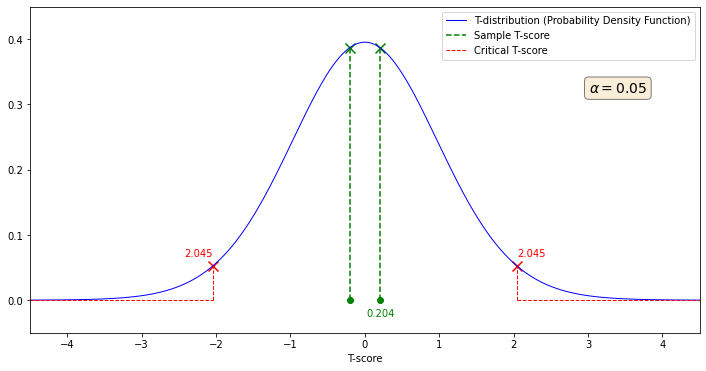

In [ ]:
# Simulate the (x,y) values for the t-distribution
t_distribution_x_values = np.linspace(-5, 5, 10000)
t_distribution_y_values = scipy.stats.t.pdf(t_distribution_x_values, df=29)

# Display the t-distribution
_, ax = plt.subplots(figsize=(12, 6))

plt.plot(t_distribution_x_values, t_distribution_y_values, color='blue', lw=1, label='T-distribution (Probability Density Function)')

# Plot the calculated t-scores
plt.scatter([-calculated_t_score, calculated_t_score], scipy.stats.t.pdf([-calculated_t_score, calculated_t_score], df=29), marker='x', s=100, color='green')
plt.scatter([-calculated_t_score, calculated_t_score], [0, 0], color='green')
plt.plot([-calculated_t_score, -calculated_t_score], [0, scipy.stats.t.pdf(-calculated_t_score, df=29)], color='green', linestyle='--', linewidth=1.5, label='Sample T-score')
plt.plot([calculated_t_score, calculated_t_score], [0, scipy.stats.t.pdf(calculated_t_score, df=29)], color='green', linestyle='--', linewidth=1.5)
t_score_color = 'green' if t_test_result == 'Passed' else 'red'
plt.text(x=np.abs(calculated_t_score), y=-0.02, va='center', ha='center', color=t_score_color, s=str(np.abs(np.round(calculated_t_score, 3))))

# Plot the critical t-scores
plt.plot([-critical_t_score, -critical_t_score], [0, scipy.stats.t.pdf(-critical_t_score, df=29)], color='red', linestyle='--', linewidth=1, label='Critical T-score')
plt.plot([critical_t_score, critical_t_score], [0, scipy.stats.t.pdf(critical_t_score, df=29)], color='red', linestyle='--', linewidth=1)
plt.plot([-4.5, min(-critical_t_score, critical_t_score)], [0, 0], color='red', linestyle='--', linewidth=1)
plt.plot([max(-critical_t_score, critical_t_score), 4.5], [0, 0], color='red', linestyle='--', linewidth=1)
plt.scatter([-critical_t_score, critical_t_score], scipy.stats.t.pdf([-critical_t_score, critical_t_score], df=29), marker='x', s=100, color='red')
plt.text(x=-critical_t_score, y=scipy.stats.t.pdf(-critical_t_score, df=29)+0.02,
         va='center', ha='right', color='red', s=str(np.abs(np.round(critical_t_score, 3))))
plt.text(x=critical_t_score, y=scipy.stats.t.pdf(critical_t_score, df=29)+0.02,
         va='center', ha='left', color='red', s=str(np.abs(np.round(-critical_t_score, 3))))

# Write a title box for the significance level
ax.text(3.4, 0.325, r'$\alpha=%.2f$' % (significance_threshold,), fontsize=14, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Constrain and configure the t-distribution plot
plt.xlabel('T-score') ; plt.xlim([-4.5, 4.5]) ; plt.ylim([-0.05, 0.45]) ; plt.legend() ; plt.show()

With all these information at hand (calculated T-score **0.204** below critical T-score **2.045**, and p-value above the significance level 𝛂=**0.05**), we can definitely state with a high degree of confidence that **there is no statistically significant difference** between the mean of our sample we observed and the mean of the population this sample has been drawn from.

In other words, **we cannot reject the null hypothesis** because there are high chances our sample came from a population with a mean of 50, which was our expected result beforehand.